# Objetivo:
 

 - Encontrar o melhor algoritmo  para fazer a previsão do preço dos carros populares. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/3%20-%20EDA/carros_populares_sem_outliers.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,modelo,marca,motor,preco,quilometragem,ano,informacoes
0,Agile,Chevrolet,1.4,25990,91000.0,2011,Agile 1.4 Lt 5p
1,Agile,Chevrolet,1.4,28900,123915.0,2013,Agile 1.4 Ltz 5p
2,Agile,Chevrolet,1.4,28000,91000.0,2013,Agile 1.4 Lt 5p
3,Agile,Chevrolet,1.4,26890,151000.0,2011,Agile 1.4 Mpfi Ltz 8v
4,Agile,Chevrolet,1.4,31990,106863.0,2014,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   modelo         7769 non-null   object 
 1   marca          7769 non-null   object 
 2   motor          7769 non-null   float64
 3   preco          7769 non-null   int64  
 4   quilometragem  7769 non-null   float64
 5   ano            7769 non-null   int64  
 6   informacoes    7769 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 425.0+ KB


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,7769.0,1.66,0.50,1.0,1.4,1.6,2.0,3.8
preco,7769.0,42239.35,16867.66,8500.0,28990.0,38969.0,53990.0,80000.0
quilometragem,7769.0,89710.59,42726.23,5000.0,56320.0,88502.0,119769.0,210000.0
ano,7769.0,2014.00,3.50,2008.0,2011.0,2014.0,2017.0,2021.0


In [7]:
df.isna().sum()

modelo           0
marca            0
motor            0
preco            0
quilometragem    0
ano              0
informacoes      0
dtype: int64

 - Filtrando outliers.

In [8]:
dados = df

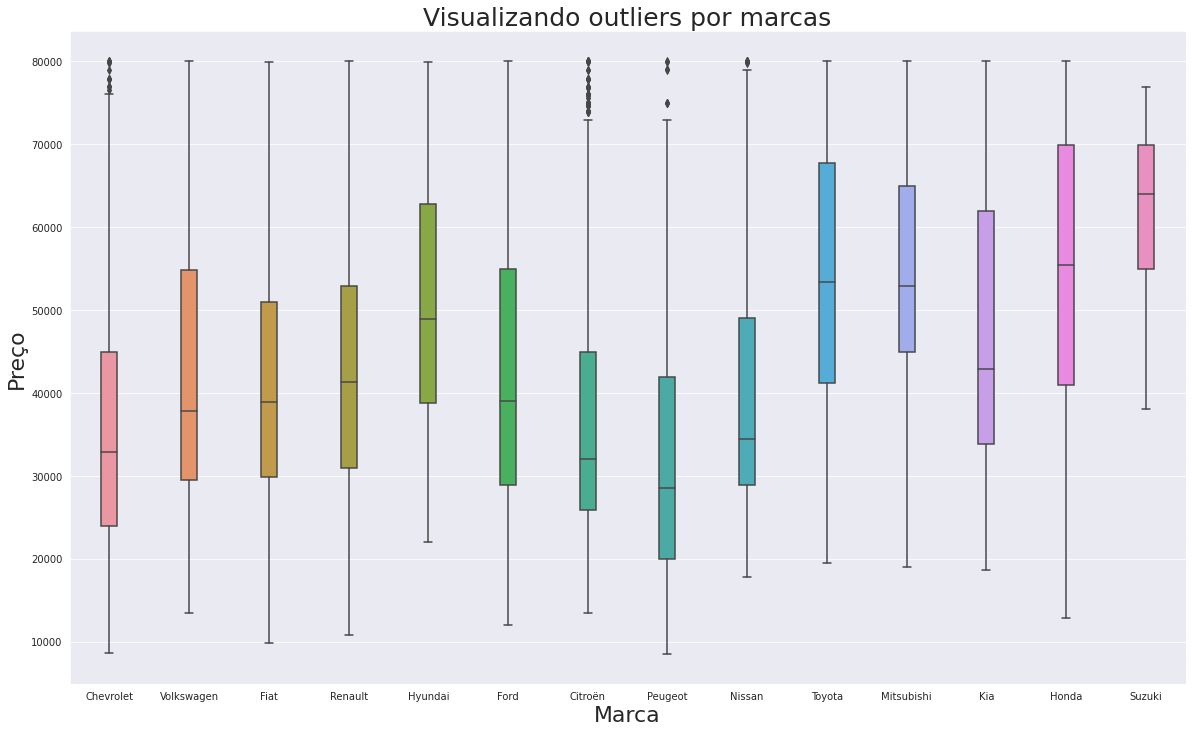

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='marca', y='preco', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Visualizando outliers por marcas', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Marca', fontsize=22)
ax

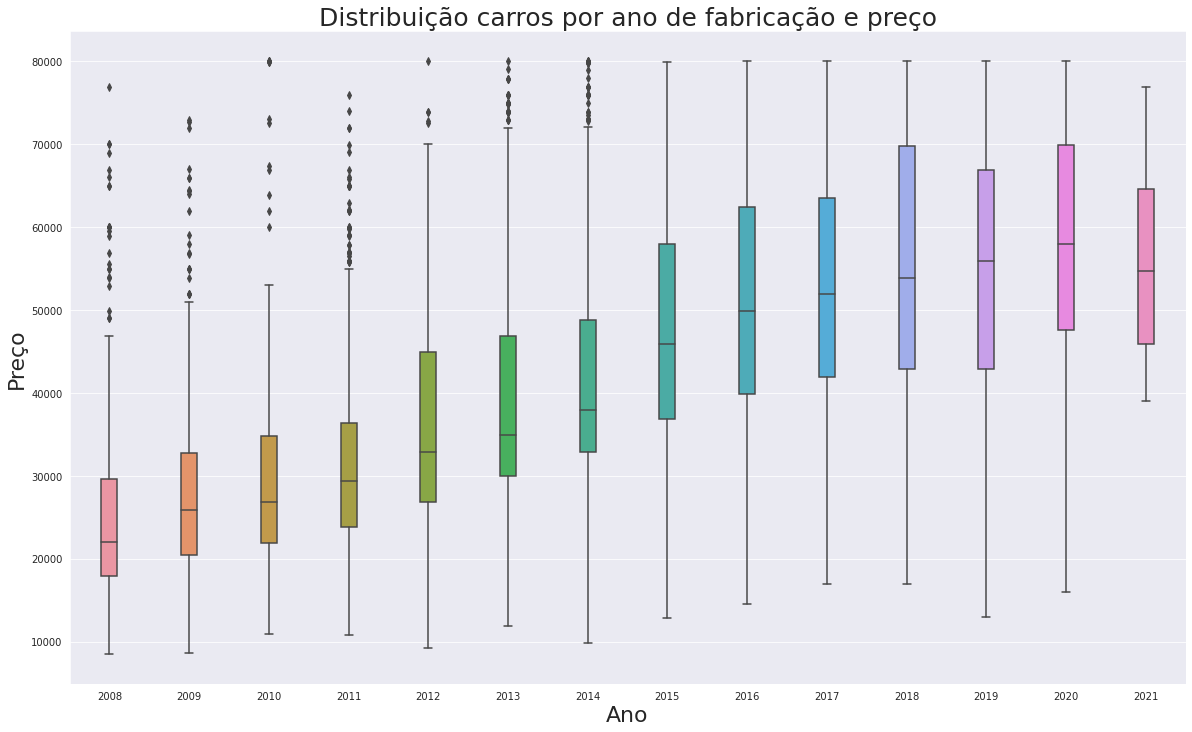

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='ano', y='preco', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros por ano de fabricação e preço', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Ano', fontsize=22)
ax

## Definindo as amostras de treino e teste

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enconder = LabelEncoder()

In [13]:
dados['marca'] = enconder.fit_transform(dados['marca'])
dados['modelo'] = enconder.fit_transform(dados['modelo'])

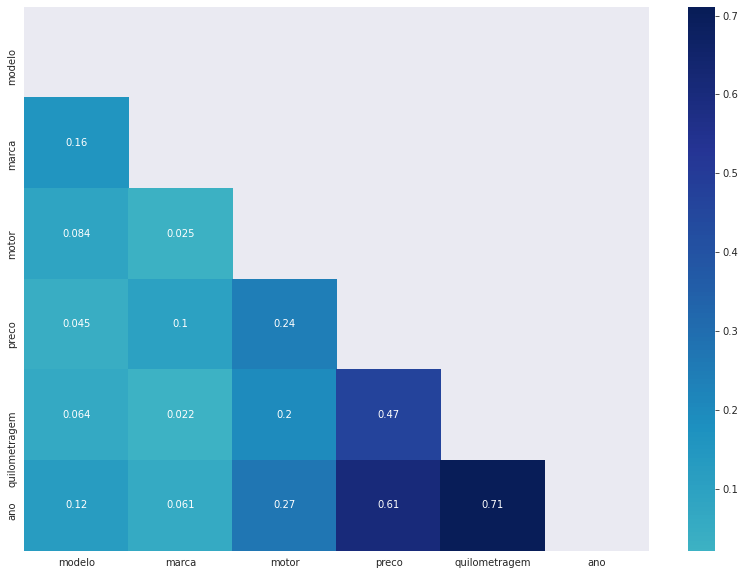

In [14]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = dados.drop(columns=['preco','informacoes'])
Y = dados['preco']

In [17]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 )

In [18]:
# treino['preco'] = treino['preco'].apply(np.log1p)
# treino['quilometragem'] = treino['quilometragem'].apply(np.log1p)
# teste['preco'] = teste['preco'].apply(np.log1p)
# teste['quilometragem'] = teste['quilometragem'].apply(np.log1p)

 - Modelo "Baseline" (Ponto de partida)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.5496783466338998

 - Machine learning

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9919558664084195
Test score 0.608050283273603
Treinando RandomForestRegressor
Train score 0.9617380118535629
Test score 0.7657907487498047
Treinando MLPRegressor
Train score 0.24291597078953775
Test score 0.23525251417598003
Treinando XGBRegressor
[17:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.7516060828328912
Test score 0.7250702283826602


In [22]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9919558664084195
Validation score [0.58106206 0.58578371 0.6441994  0.5693379  0.56112055]
Test score 0.6079975341586445
Treinando RandomForestRegressor
Train score 0.9617655728183883
Validation score [0.74025997 0.7859181  0.78892363 0.72789547 0.72804464]
Test score 0.7664138797872764
Treinando MLPRegressor
Train score 0.2436200301233642
Validation score [0.23059955 0.22551407 0.26801892 0.19887642 0.23223614]
Test score 0.23612774290883654
Treinando XGBRegressor
[17:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

## Gridsearch XGBRegressor

In [24]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100,150,200,250]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)
xgb = gs.best_estimator_

train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=3)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[17:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.8793083585337251
Validation score [0.75279048 0.78584254 0.76135513]
Test score 0.7783948755450683


 - Calculando o erro

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [26]:
y_pred = xgb.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 5209.5274
MSE = 61249052.6102
RMSE = 7826.1774
R2 = 0.7784


## Gridsearch RandomForest

In [27]:
from sklearn.model_selection import GridSearchCV
parameters=[{
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth':[3,4,5,6,7,8,9,10],
            'n_estimators':np.arange(1,51,5)}]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5, refit = True)
gs.fit(X_treino, Y_treino)
reg = gs.best_estimator_

train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.8611274440697831
Validation score [0.74742711 0.79121722 0.79577011 0.74138175 0.74268426]
Test score 0.7659735138413444


 - Calculando o erro

In [28]:
y_pred = reg.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 5406.9696
MSE = 64682171.0381
RMSE = 8042.5227
R2 = 0.7660
